In [31]:
import requests
import json
import urllib
import os
import datetime as dt
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
from pandas import read_csv
from pandas import read_excel
from pandas import merge
import numpy as np
import seaborn as sns


from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_ind

from statsmodels.sandbox.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from scipy import stats
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

# 업종별 카드 매출과 매장수현황

In [2]:
from pandas import read_csv

In [3]:
undf=read_csv('1_제주 예비창업자를 위한 업종별 카드 매출과 매장수 데이터 활용.csv',encoding='euc-kr')

In [4]:
nodf=read_csv('3_상권분석을 위한 유동인구에 따른 카드 매출액 변화 데이터 활용.csv',encoding='euc-kr')
nodf

,년월,시도명,읍면동명,업종명,성별,이용금액,거주인구,근무인구,방문인구,데이터기준일자
0,2017-01,서귀포시,남원읍,건강보조식품 소매업,남성,137500,4365500.518,380992.059,2844836.615,2020-12-15
1,2017-01,서귀포시,남원읍,비알콜 음료점업,남성,2904000,4365500.518,380992.059,2844836.615,2020-12-15
2,2017-01,서귀포시,남원읍,여관업,남성,6283900,4365500.518,380992.059,2844836.615,2020-12-15
3,2017-01,서귀포시,남원읍,스포츠 및 레크레이션 용품 임대업,남성,8671410,4365500.518,380992.059,2844836.615,2020-12-15
4,2017-01,서귀포시,남원읍,슈퍼마켓,남성,55925490,4365500.518,380992.059,2844836.615,2020-12-15
...,...,...,...,...,...,...,...,...,...,...
90538,2020-04,제주시,화북동,수산물 소매업,여성,2216500,9241265.990,481026.216,2598152.464,2020-12-15
90539,2020-04,제주시,화북동,서양식 음식점업,여성,5374000,9241265.990,481026.216,2598152.464,2020-12-15
90540,2020-04,제주시,화북동,빵 및 과자류 소매업,여성,24042720,9241265.990,481026.216,2598152.464,2020-12-15
90541,2020-04,제주시,화북동,육류 소매업,여성,24474030,9241265.990,481026.216,2598152.464,2020-12-15


In [5]:
nodf['읍면동명'].unique()

array(['남원읍', '도두동', '대정읍', '대륜동', '동홍동', '대천동', '예래동', '서홍동', '성산읍',
       '송산동', '안덕면', '영천동', '건입동', '정방동', '중문동', '표선면', '천지동', '중앙동',
       '구좌읍', '효돈동', '노형동', '용담2동', '이호동', '봉개동', '삼도2동', '삼도1동', '아라동',
       '삼양동', '애월읍', '연동', '오라동', '외도동', '용담1동', '우도면', '이도2동', '이도1동',
       '일도1동', '일도2동', '한림읍', '한경면', '조천읍', '추자면', '화북동'], dtype=object)

In [6]:
undf['읍면동명'].unique()

array(['강정동', '삼도일동', '삼양이동', '삼도이동', '아라일동', '연동', '노형동', '도두이동', '도두일동',
       '도남동', '봉개동', '외도일동', '외도이동', '용담삼동', '용담이동', '오라일동', '오등동',
       '오라이동', '한경면', '추자면', '조천읍', '한림읍', '우도면', '건입동', '내도동', '용담일동',
       '이호일동', '일도이동', '이도일동', '일도일동', '이도이동', '해안동', '애월읍', '구좌읍',
       '삼양일동', '아라이동', '삼양삼동', '화북일동', '영평동', '오라삼동', '도련이동', '도련일동',
       '도평동', '이호이동', '화북이동', '월평동', '용강동', '회천동', '하예동', '중문동', '토평동',
       '신효동', '하원동', '하효동', '호근동', '회수동', '서홍동', '색달동', '보목동', '상예동',
       '상효동', '서귀동', '법환동', '서호동', '도순동', '대포동', '동홍동', '남원읍', '대정읍',
       '성산읍', '안덕면', '표선면', '영남동'], dtype=object)

In [7]:
conditions=[
    nodf['읍면동명'] == '용담2동',
    nodf['읍면동명'] == '삼도2동',
    nodf['읍면동명'] == '삼도1동',
    nodf['읍면동명'] == '용담1동',
    nodf['읍면동명'] == '이도2동',
    nodf['읍면동명'] == '이도1동',
    nodf['읍면동명'] == '일도1동',
]

#보정될 이름조건 나열
name=['용담이동','삼도이동','삼도일동','용담일동','이도이동','이도일동','일도일동']

nodf['읍면동명']=np.select(conditions, name, default=nodf['읍면동명'])

nodf['읍면동명'].unique()

array(['남원읍', '도두동', '대정읍', '대륜동', '동홍동', '대천동', '예래동', '서홍동', '성산읍',
       '송산동', '안덕면', '영천동', '건입동', '정방동', '중문동', '표선면', '천지동', '중앙동',
       '구좌읍', '효돈동', '노형동', '용담이동', '이호동', '봉개동', '삼도이동', '삼도일동', '아라동',
       '삼양동', '애월읍', '연동', '오라동', '외도동', '용담일동', '우도면', '이도이동', '이도일동',
       '일도일동', '일도2동', '한림읍', '한경면', '조천읍', '추자면', '화북동'], dtype=object)

In [8]:
for i in nodf['읍면동명'].unique():
    if i in undf['읍면동명'].unique():
        continue
    else:
        print(i)

도두동
대륜동
대천동
예래동
송산동
영천동
정방동
천지동
중앙동
효돈동
이호동
아라동
삼양동
오라동
외도동
일도2동
화북동


In [9]:
for i in undf['읍면동명'].unique():
    if i in nodf['읍면동명'].unique():
        continue
    else:
        print(i)

강정동
삼양이동
아라일동
도두이동
도두일동
도남동
외도일동
외도이동
용담삼동
오라일동
오등동
오라이동
내도동
이호일동
일도이동
해안동
삼양일동
아라이동
삼양삼동
화북일동
영평동
오라삼동
도련이동
도련일동
도평동
이호이동
화북이동
월평동
용강동
회천동
하예동
토평동
신효동
하원동
하효동
호근동
회수동
색달동
보목동
상예동
상효동
서귀동
법환동
서호동
도순동
대포동
영남동


In [10]:
conditions=[
    undf['읍면동명'] == '강정동',
    undf['읍면동명'] =='삼양이동',
    undf['읍면동명'] =='아라일동',
    undf['읍면동명'] =='도두이동',
    undf['읍면동명'] =='도두일동',
    undf['읍면동명'] =='외도일동',
    undf['읍면동명'] =='외도이동',
    undf['읍면동명'] =='용담삼동',
    undf['읍면동명'] =='오라일동',
    undf['읍면동명'] =='오라이동',
    undf['읍면동명'] =='이호일동',
    undf['읍면동명'] =='해안동',
    undf['읍면동명'] =='삼양일동',
    undf['읍면동명'] =='아라이동',
    undf['읍면동명'] =='삼양삼동',
    undf['읍면동명'] =='화북일동',
    undf['읍면동명'] =='영평동',
    undf['읍면동명'] =='오라삼동',
    undf['읍면동명'] =='도련이동',
    undf['읍면동명'] =='도련일동',
    undf['읍면동명'] =='도평동',
    undf['읍면동명'] =='이호이동',
    undf['읍면동명'] =='화북이동',
    undf['읍면동명'] =='월평동',
    undf['읍면동명'] =='용강동',
    undf['읍면동명'] =='회천동',
    undf['읍면동명'] =='하예동',
    undf['읍면동명'] =='토평동',
    undf['읍면동명'] =='신효동',
    undf['읍면동명'] =='하원동',
    undf['읍면동명'] =='하효동',
    undf['읍면동명'] =='호근동',
    undf['읍면동명'] =='회수동',
    undf['읍면동명'] =='색달동',
    undf['읍면동명'] =='보목동',
    undf['읍면동명'] =='상예동',
    undf['읍면동명'] =='상효동',
    undf['읍면동명'] =='서귀동',
    undf['읍면동명'] =='법환동',
    undf['읍면동명'] =='서호동',
    undf['읍면동명'] =='도순동',
    undf['읍면동명'] =='대포동',
    undf['읍면동명'] =='영남동',
    undf['읍면동명'] =='도남동',
    undf['읍면동명'] =='오등동',
    undf['읍면동명'] =='내도동',
    undf['읍면동명'] =='이도동'
]

#보정될 이름조건 나열
name=['대천동','삼양동','아라동','도두동','도두동','외도동','외도동','용담이동','오라동','오라동','이호동','노형동','삼양동','아라동','삼양동','화북동','아라동',
      '삼양동','삼양동','외도동','이호동','화북동','아라동','봉개동','봉개동','예래동','예래동','영천동','효돈동','중문동','효돈동','대륜동','중문동','예래동',
      '송산동','예래동','영천동','송산동','대륜동','대륜동','대천동','중문동','대천동','이도일동','아라동','외도동','이도일동']

undf['읍면동명']=np.select(conditions, name, default=undf['읍면동명'])

undf['읍면동명'].unique()

array(['대천동', '삼도일동', '삼양동', '삼도이동', '아라동', '연동', '노형동', '도두동', '이도일동',
       '봉개동', '외도동', '용담이동', '오라동', '한경면', '추자면', '조천읍', '한림읍', '우도면',
       '건입동', '용담일동', '이호동', '일도이동', '일도일동', '이도이동', '애월읍', '구좌읍', '화북동',
       '예래동', '중문동', '영천동', '효돈동', '대륜동', '서홍동', '송산동', '동홍동', '남원읍',
       '대정읍', '성산읍', '안덕면', '표선면'], dtype=object)

In [11]:
print(len(undf['읍면동명'].unique()),len(nodf['읍면동명'].unique()))

40 43


In [12]:
for i in undf['읍면동명'].unique():
    if i in nodf['읍면동명'].unique():
        continue
    else:
        print(i)

일도이동


In [13]:
filun=undf.filter(['읍면동명','업종명','이용자 구분','이용금액'])
filun

,읍면동명,업종명,이용자 구분,이용금액
0,대천동,슈퍼마켓,제주도민,365160
1,삼도일동,여관업,제주도민,40000
2,삼양동,여관업,제주도민,162000
3,삼양동,여관업,제주도민,70000
4,삼도이동,여관업,내국인,3150460
...,...,...,...,...
1642614,이도일동,한식 음식점업,제주도민,25714200
1642615,이도일동,한식 음식점업,제주도민,22466000
1642616,이도일동,한식 음식점업,제주도민,12417300
1642617,이도일동,한식 음식점업,제주도민,128000


In [14]:
filun.rename(columns={'이용자 구분':'이용자구분'},inplace=True)
filun_kor=filun.query('이용자구분 == "내국인"')
filun_kor_bz=filun_kor.groupby(['읍면동명']).sum()
filun_kor_bz

,이용금액
읍면동명,
건입동,29716682679
구좌읍,46041299630
남원읍,39696162790
노형동,102554565856
대륜동,46340006985
대정읍,36672441263
대천동,25735530639
도두동,30554010654
동홍동,18885371894


In [15]:
gr_nodf=nodf.groupby(['읍면동명']).agg({'이용금액': np.sum,'거주인구': np.mean,'근무인구':np.mean,'방문인구':np.mean})
gr_nodf

,이용금액,거주인구,근무인구,방문인구
읍면동명,,,,
건입동,74182634461,2.246218e+06,3.197207e+05,2.388639e+06
구좌읍,79882902260,3.990879e+06,4.508328e+05,2.822100e+06
남원읍,87235451286,4.129584e+06,3.440418e+05,2.523521e+06
노형동,401317593377,1.726485e+07,2.052404e+06,7.413227e+06
대륜동,109195696037,4.067474e+06,4.478914e+05,2.845208e+06
대정읍,96310014904,5.476393e+06,3.505851e+05,2.140224e+06
대천동,55154085834,2.140567e+06,2.055783e+05,1.995000e+06
도두동,46270823836,3.958797e+05,7.355762e+04,1.283224e+06
동홍동,107373092058,5.665350e+06,5.393706e+05,2.487245e+06


In [16]:
merge_df=merge(filun_kor_bz,gr_nodf,on=['읍면동명'])
merge_df

,이용금액_x,이용금액_y,거주인구,근무인구,방문인구
읍면동명,,,,,
건입동,29716682679,74182634461,2.246218e+06,3.197207e+05,2.388639e+06
구좌읍,46041299630,79882902260,3.990879e+06,4.508328e+05,2.822100e+06
남원읍,39696162790,87235451286,4.129584e+06,3.440418e+05,2.523521e+06
노형동,102554565856,401317593377,1.726485e+07,2.052404e+06,7.413227e+06
대륜동,46340006985,109195696037,4.067474e+06,4.478914e+05,2.845208e+06
대정읍,36672441263,96310014904,5.476393e+06,3.505851e+05,2.140224e+06
대천동,25735530639,55154085834,2.140567e+06,2.055783e+05,1.995000e+06
도두동,30554010654,46270823836,3.958797e+05,7.355762e+04,1.283224e+06
동홍동,18885371894,107373092058,5.665350e+06,5.393706e+05,2.487245e+06


In [17]:
final_df=merge_df.rename(columns={'이용금액_x':'2018부터금액','이용금액_y':'카드이용금액'})
final_df.drop('2018부터금액',axis=1,inplace=True)
final_df1=final_df.sort_values(by='카드이용금액')
final_df2=final_df.sort_values(by='거주인구')
final_df3=final_df.sort_values(by='근무인구')
final_df4=final_df.sort_values(by='방문인구')

<AxesSubplot:xlabel='읍면동명'>

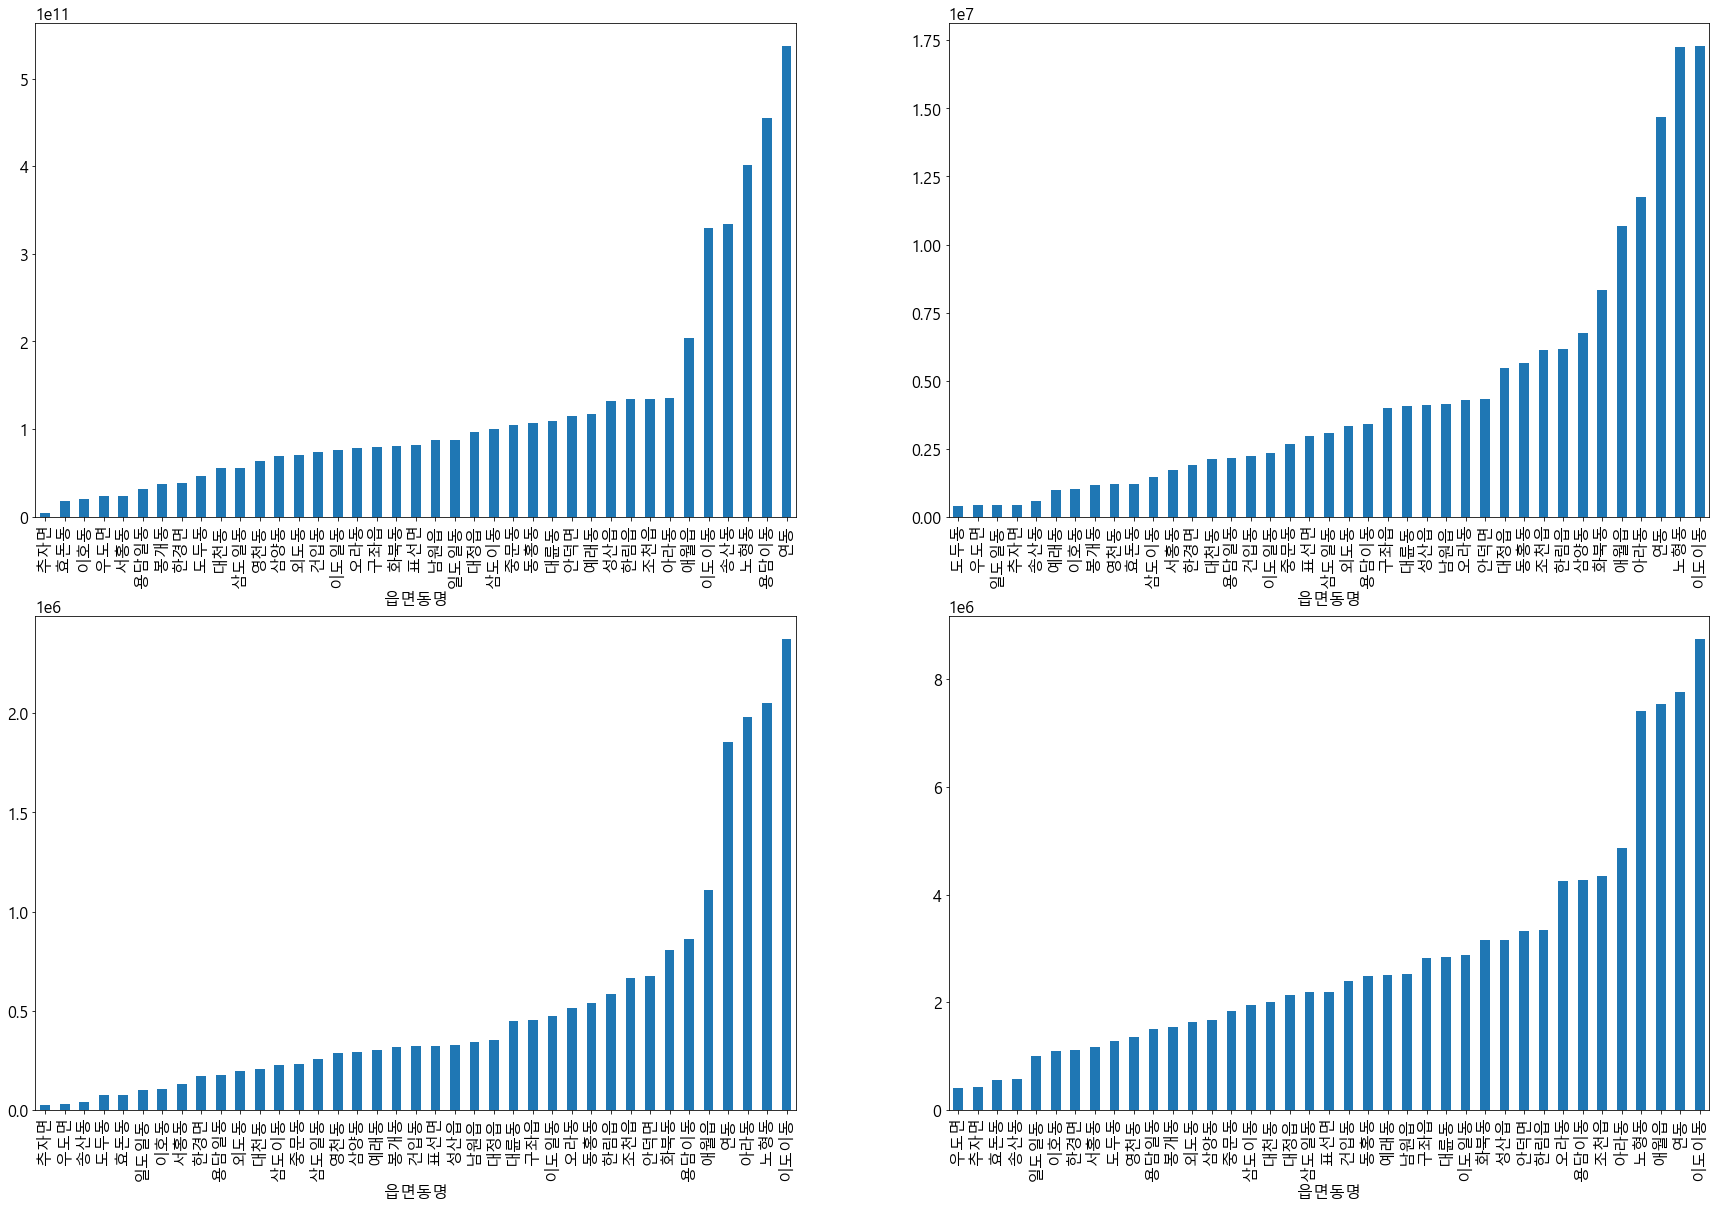

In [18]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(30,20))

final_df1['카드이용금액'].plot.bar(ax=ax1)
final_df2['거주인구'].plot.bar(ax=ax2)
final_df3['근무인구'].plot.bar(ax=ax3)
final_df4['방문인구'].plot.bar(ax=ax4)


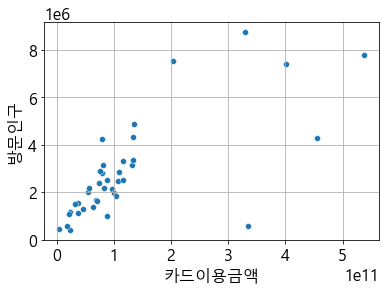

In [19]:
sns.scatterplot(data=final_df,x='카드이용금액',y='방문인구')
plt.grid()

In [20]:
상관계수, pvalue=stats.pearsonr(final_df['카드이용금액'],final_df['방문인구'])
print('상관계수 : {0}, pvalue : {1}'.format(상관계수,pvalue))

상관계수 : 0.7246476088114928, pvalue : 1.8285564117433886e-07


### 매장수와 이용금액은 높은 상관관계를 갖는다

In [21]:
final_df.corr()

,카드이용금액,거주인구,근무인구,방문인구
카드이용금액,1.000000,0.655773,0.704930,0.724648
거주인구,0.655773,1.000000,0.945005,0.908866
근무인구,0.704930,0.945005,1.000000,0.918228
방문인구,0.724648,0.908866,0.918228,1.000000


c:\users\20082\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\20082\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\20082\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\20082\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


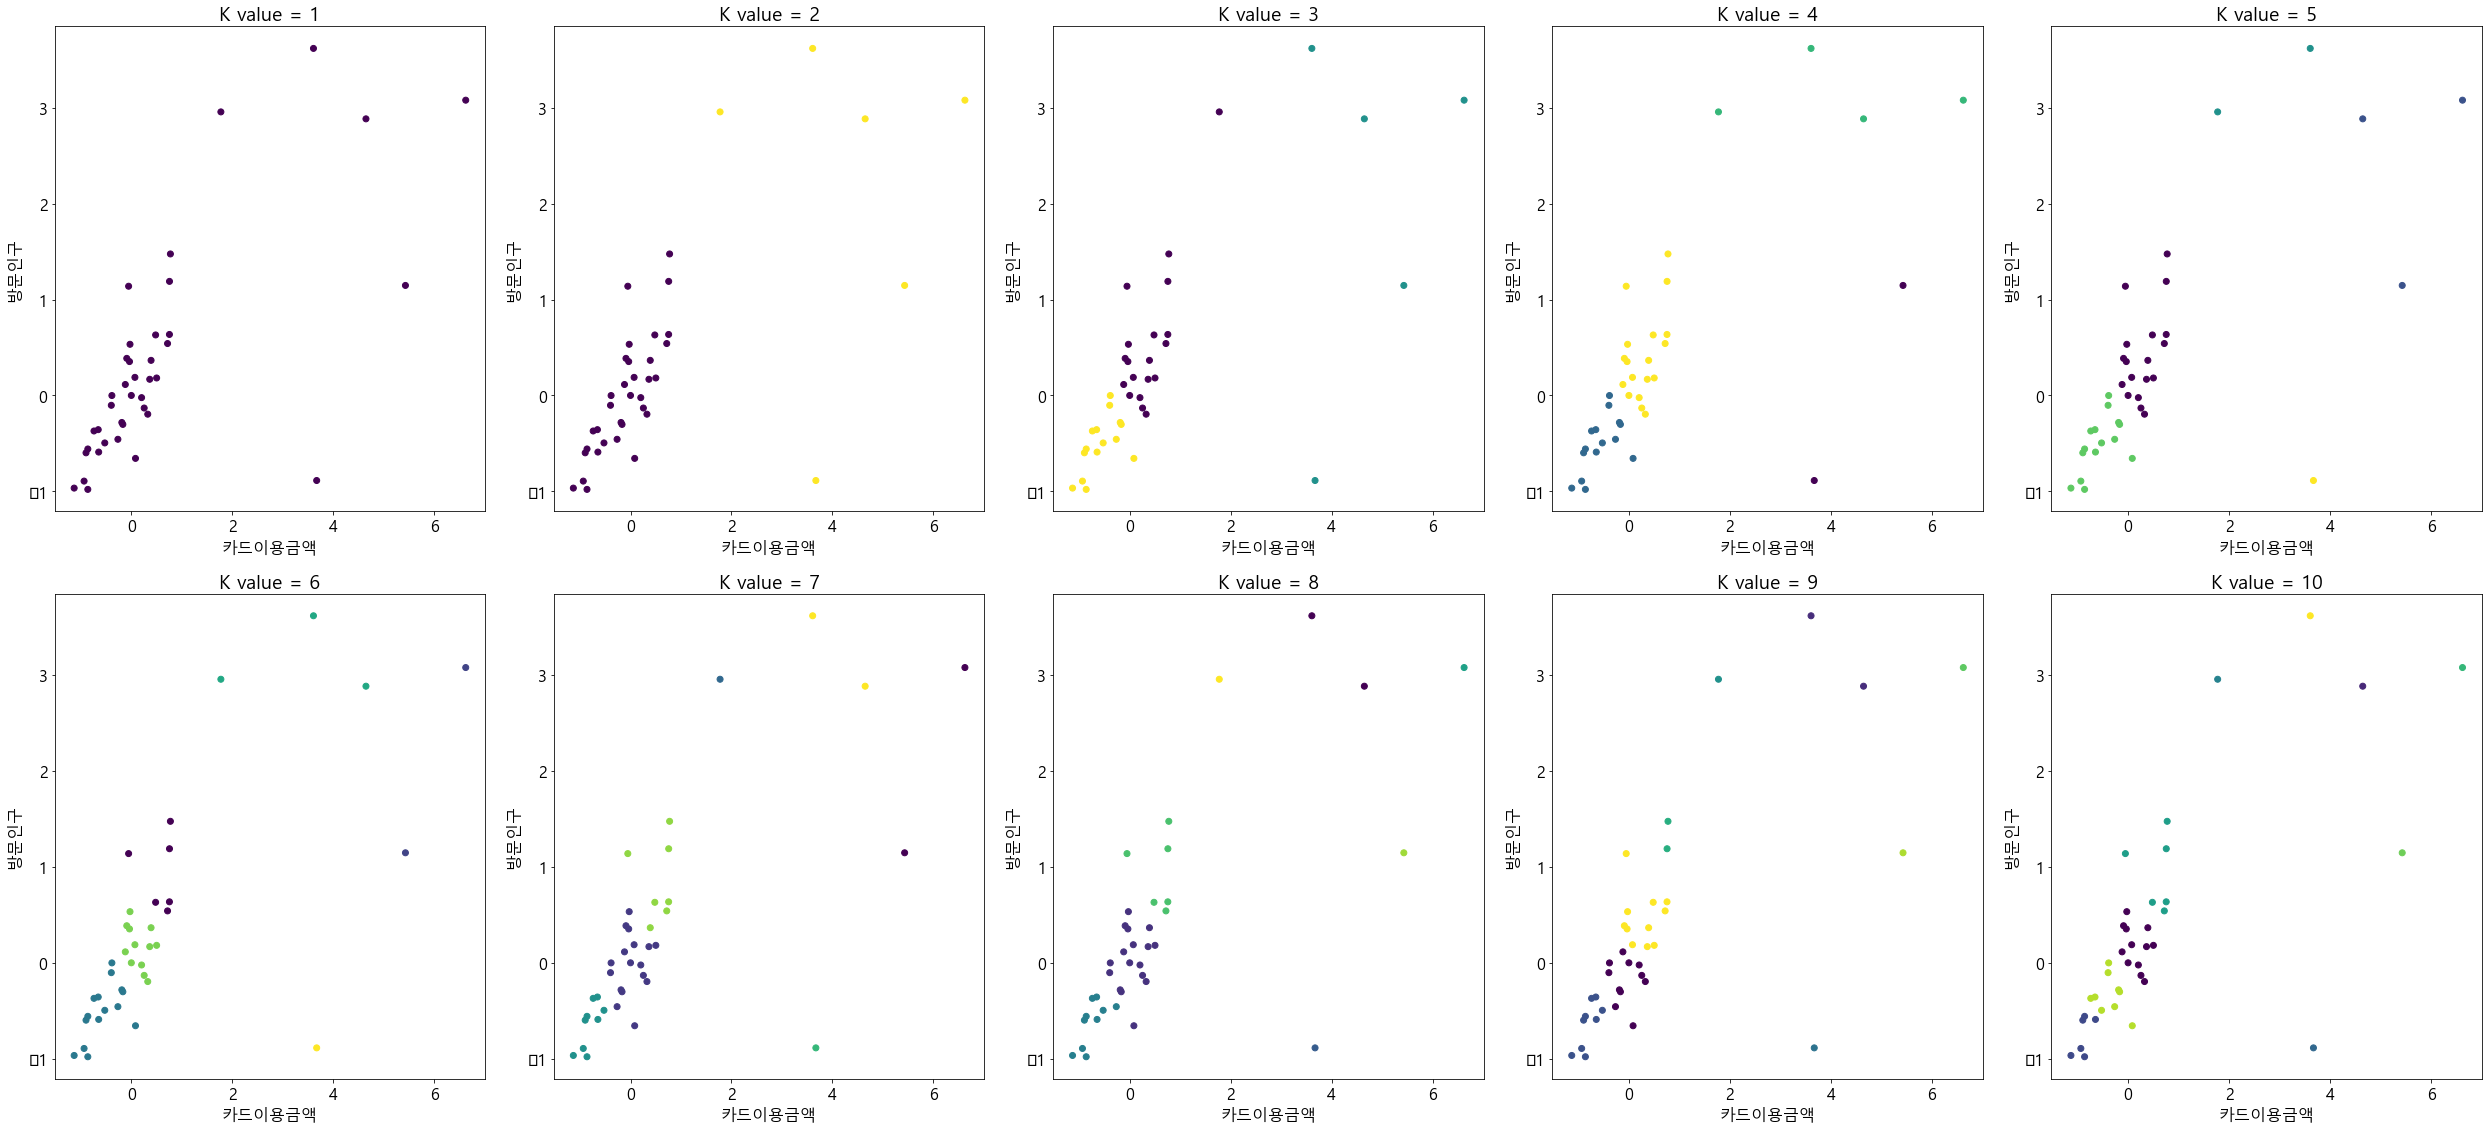

In [36]:
# 데이터 전처리 - 정규화를 위한 작업
scaler = RobustScaler()
final_df[['카드이용금액', '방문인구']] = scaler.fit_transform(final_df[['카드이용금액', '방문인구']])


plt.rcParams['figure.figsize'] = (35, 16)
for i in range(1, 11):
       # 클러스터 생성
    estimator = KMeans(n_clusters = i)
    ids = estimator.fit_predict(final_df[['카드이용금액', '방문인구']])

       # 2행 5열을 가진 서브플롯 추가 (인덱스 = i)
    plt.subplot(2, 5, i)
    plt.tight_layout()

        # 서브플롯의 라벨링
    plt.title("K value = {}".format(i))
    plt.xlabel('카드이용금액')
    plt.ylabel('방문인구')
    

        # 클러스터링 그리기
    plt.scatter(final_df['카드이용금액'], final_df['방문인구'], c=ids)
        
plt.show()

In [38]:
final_df[['카드이용금액', '방문인구']] 

,카드이용금액,방문인구
읍면동명,,
건입동,-0.119047,0.114264
구좌읍,-0.035994,0.353241
남원읍,0.071133,0.188628
노형동,4.647320,2.884431
대륜동,0.391095,0.365981
대정읍,0.203350,-0.022692
대천동,-0.396293,-0.102757
도두동,-0.525723,-0.495175
동홍동,0.364539,0.168628


In [44]:
# K = 4으로 클러스터링
estimator = KMeans(n_clusters = 4)

# 클러스터링 생성
cluster_ids = estimator.fit_predict(final_df[['카드이용금액', '방문인구']])


In [46]:
cluster_ids

array([0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 3, 0, 0, 1, 1, 2, 0,
       0, 2, 3, 2, 2, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2])

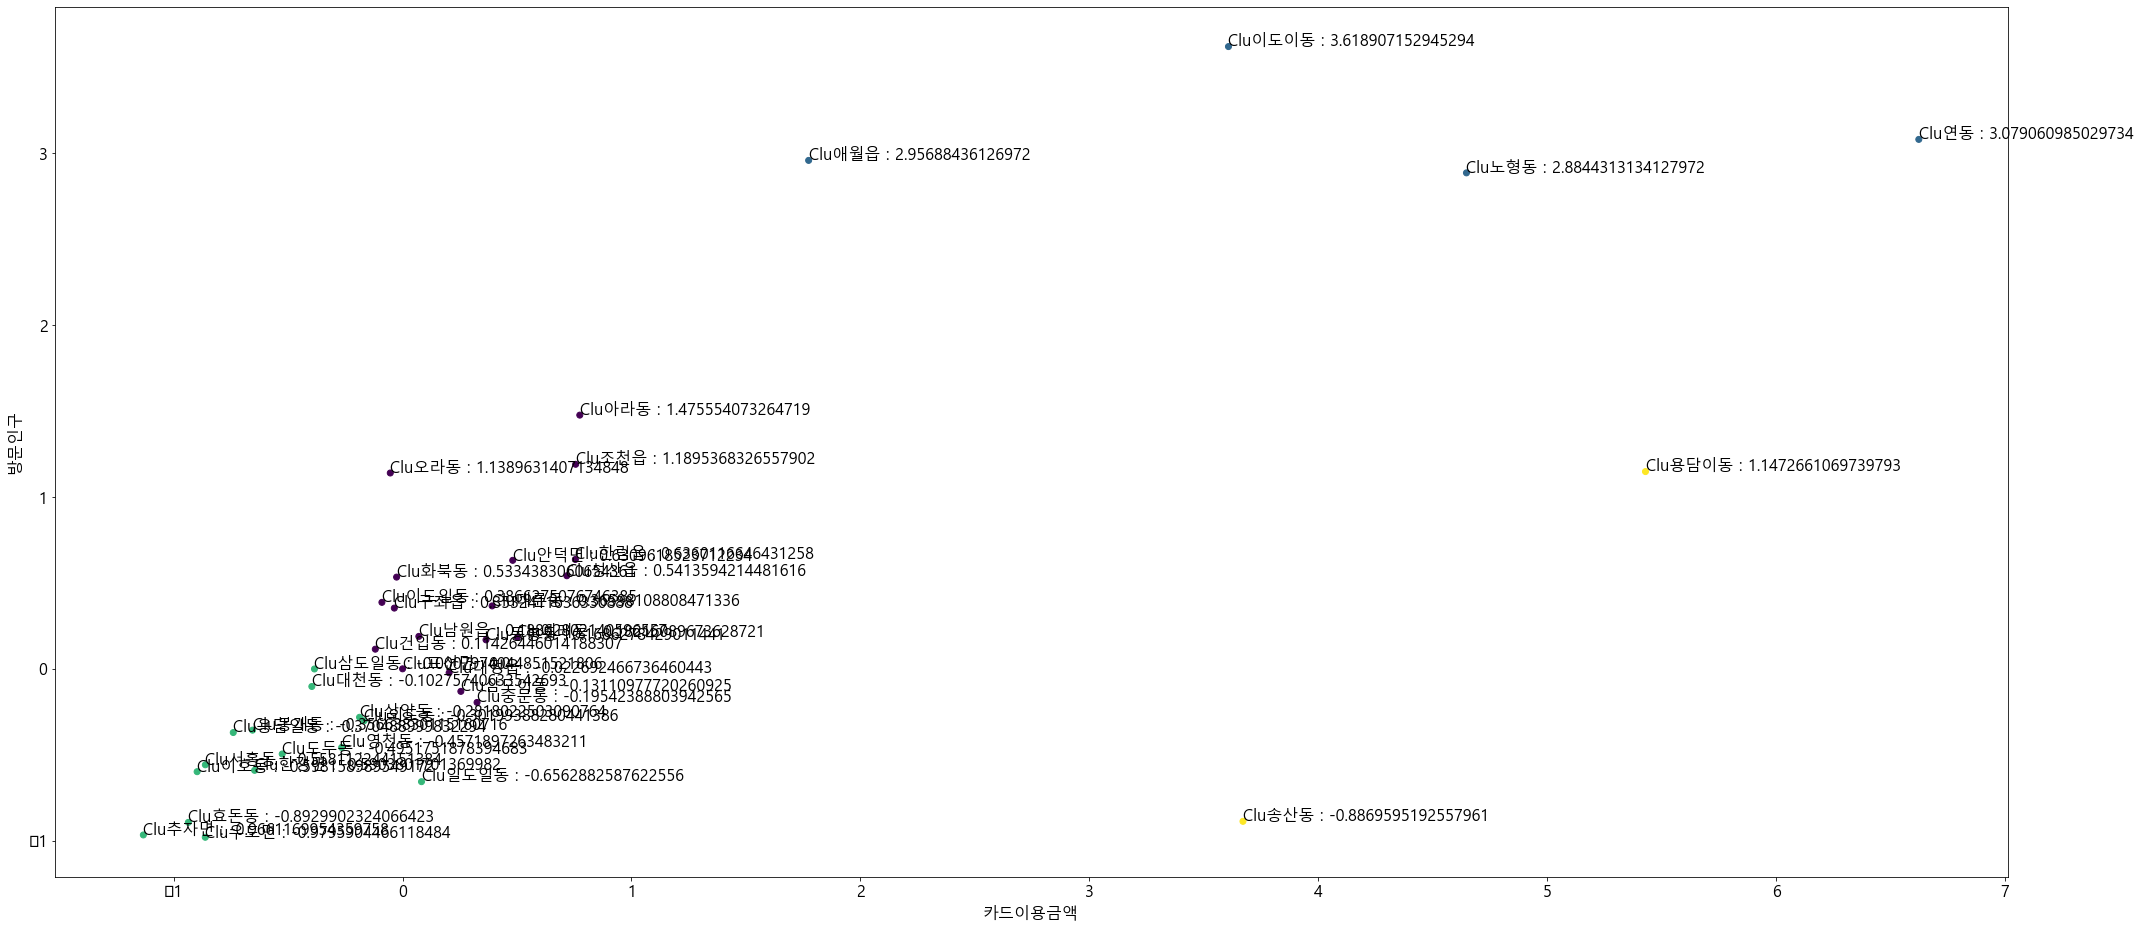

In [49]:

# create a scatter plot
plt.rcParams['figure.figsize'] = (35, 16)
plt.scatter(final_df['카드이용금액'], final_df['방문인구'], c=cluster_ids)

# 지역과 클러스터 id로 데이터에 범례 달기
for index, 금액 , 거주인구, 근무인구, 방문인구 in final_df.itertuples():
    plt.annotate("Clu{} : {}".format(index,방문인구),(금액+0.0001, 방문인구+0.002))
    
plt.xlabel('카드이용금액')
plt.ylabel('방문인구')
plt.show()

In [25]:
reg=ols('카드이용금액~방문인구',data=final_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 카드이용금액   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     40.91
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           1.83e-07
Time:                        22:09:00   Log-Likelihood:                 16.913
No. Observations:                  39   AIC:                            -29.83
Df Residuals:                      37   BIC:                            -26.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0289      0.039      0.732      0.469      -0.051       0.109
방문인구           0.6734      0.105      6.396      0.000       0.460       0.887
==============================================================================
Omnibus:                       35.070   Durbin-Watson:                   2.399
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.471
Skew:                           2.320   Prob(JB):                     2.76e-19
Kurtosis:                       8.574   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
y=0.0291+(0.6745*final_df['방문인구'])

In [27]:
b,a,=reg.params

In [28]:
y=a*final_df['방문인구']+b
y

읍면동명
건입동     0.189079
구좌읍     0.224075
남원읍     0.199969
노형동     0.594750
대륜동     0.225941
대정읍     0.169022
대천동     0.157297
도두동     0.099830
동홍동     0.197040
봉개동     0.120118
삼도이동    0.153145
삼도일동    0.172229
삼양동     0.131077
서홍동     0.090614
성산읍     0.251624
송산동     0.042456
아라동     0.388430
안덕면     0.264745
애월읍     0.605360
연동      0.623252
영천동     0.105393
예래동     0.199022
오라동     0.339139
외도동     0.128120
용담이동    0.340354
용담일동    0.118090
우도면     0.028891
이도이동    0.702309
이도일동    0.228964
이호동     0.084749
일도일동    0.076237
조천읍     0.346545
중문동     0.143727
추자면     0.030864
표선면     0.172345
한경면     0.085888
한림읍     0.265485
화북동     0.250464
효돈동     0.041573
Name: 방문인구, dtype: float64

In [29]:
#상관분석 추세선
x=final_df['카드이용금액']
y=final_df['방문인구']

z=np.polyfit(x,y,1)

f=np.poly1d(z)
f

poly1d([0.77977469, 0.11238746])

In [30]:
sns.lmplot(x='읍면동명', y=y, data=final_df)

c:\users\20082\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: Invalid comparison between dtype=float64 and str